In [11]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [12]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Road/CDI_Based/Intensity/CSV/Harris_With_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-12-a54a7c18214b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-12-a54a7c18214b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.002060,0.000932,0.002091,0.002628,0.001357,0.000489,0.001099,0.001249,0.001766,0.004993,...,0.001954,0.001539,0.001683,0.009700,0.000651,0.000299,0.001561,0.001816,0.001858,1
1,0.045637,0.060683,0.056248,0.064797,0.060077,0.045487,0.028009,0.035556,0.023756,0.031816,...,0.047211,0.027080,0.027964,0.049830,0.070174,0.065835,0.036941,0.028811,0.043441,1
2,0.460397,0.488734,0.599460,0.582167,0.634067,0.625836,0.629815,0.542359,0.326263,0.302863,...,0.282526,0.248250,0.234649,0.281436,0.332933,0.241064,0.213618,0.274977,0.518211,1
3,0.071231,0.068655,0.813084,0.819467,0.101225,0.038614,0.038915,0.805319,0.845608,0.037186,...,0.033717,0.005615,0.004017,0.909425,0.875821,0.768890,0.017163,0.016047,0.012783,1
4,0.220322,0.254476,0.182284,0.187489,0.163019,0.142676,0.149381,0.189343,0.218062,0.193886,...,0.221050,0.197585,0.225845,0.327639,0.219883,0.205631,0.213861,0.182392,0.205965,1


In [13]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [14]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.6170212765957447
              precision    recall  f1-score   support

          -1       0.72      0.75      0.74       101
           1       0.31      0.28      0.29        40

    accuracy                           0.62       141
   macro avg       0.51      0.51      0.51       141
weighted avg       0.61      0.62      0.61       141



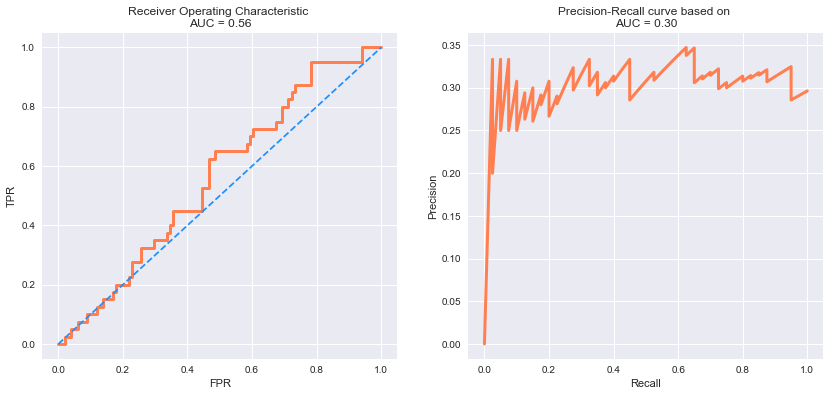

In [15]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()